In [296]:
import pandas as pd
import numpy as np
import seaborn as sns

In [297]:
tr1=pd.read_csv('trvhe.csv')

In [298]:
tr1.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [299]:
import datetime as dt

In [300]:
 yr=pd.to_datetime(tr1['Policy Start Date'])
 yr1=pd.to_datetime(tr1['Policy End Date'])

In [301]:
tr1['Pol_start']= yr.dt.year
tr1['Pol_end']= yr1.dt.year

In [302]:
Sub_time=yr1-yr
tr1['Sub-time']=Sub_time

In [303]:
X=tr1.drop(['Policy Start Date','Policy End Date','First Transaction Date','ID','target'],axis=1)
y=tr1['target']

In [304]:
X.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time
0,Male,30,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,2010,2011,364 days
1,Female,79,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,2010,2011,364 days
2,Male,43,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,2010,2011,364 days
3,Male,2,1,NaN,NaN,NaN,NaN,NaN,CarSafe,2010,2011,364 days
4,Entity,20,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,2010,2010,124 days


In [305]:
import dtale

In [306]:
var=pd.read_csv('VariableDefinitions_-_Sheet1.csv')

In [307]:
var

,ID,Unique ID for the customer
0,Policy Start Date,Date policy started
1,Policy End Date,Date policy ended
2,Gender,Gender of the customer
3,Age,Age of the customer
4,ProductName,Name of Insurance policy
5,First Transaction Date,First date payment was made
6,No_Pol,Number of policies the customer has
7,Car_Category,Type of car
8,Subject_Car_Colour,Car colour
9,Subject_Car_Make,Car make


In [308]:
X.isnull().sum()

Gender                 359
Age                      0
No_Pol                   0
Car_Category          3738
Subject_Car_Colour    6962
Subject_Car_Make      2476
LGA_Name              6476
State                 6488
ProductName              0
Pol_start                0
Pol_end                  0
Sub-time                 0
dtype: int64

In [476]:
from feature_engine import imputation

In [311]:
mdi=imputation.CategoricalImputer(imputation_method='frequent',variables='Gender')

In [312]:
X=mdi.fit_transform(X)

MISSING DATA FOR CAR CATEGORY

In [313]:
X['Car_Category'].isnull().sum()

3738

In [314]:
mdi2=imputation.CategoricalImputer(imputation_method='missing',variables='Car_Category')

In [315]:
X=mdi2.fit_transform(X)

MISSING DATA FOR CAR COLOUR

In [316]:
X['Subject_Car_Colour'].isnull().mean()

0.5763722162430664

In [317]:
mdi3=imputation.CategoricalImputer(imputation_method='missing',variables='Subject_Car_Colour')

In [318]:
X=mdi3.fit_transform(X)

MISSING DATA FOR CAR MAKE

In [319]:
X['Subject_Car_Make'].isnull().mean()

0.20498385627949334

In [320]:
mdi4=imputation.CategoricalImputer(imputation_method='missing',variables='Subject_Car_Make')
X=mdi4.fit_transform(X)

MISSING DATA FOR LGA NAME

In [321]:
tr2['LGA_Name'].isnull().mean()

0.5361370974418412

In [322]:
mdi5=imputation.CategoricalImputer(imputation_method='missing',variables='LGA_Name')
X=mdi5.fit_transform(X)

MISSING DATA FOR STATE

In [323]:
tr2['State'].isnull().mean()

0.5371305571653282

In [324]:
mdi6=imputation.CategoricalImputer(imputation_method='missing',variables='State')
X=mdi6.fit_transform(X)

In [325]:
X.isnull().sum()

Gender                0
Age                   0
No_Pol                0
Car_Category          0
Subject_Car_Colour    0
Subject_Car_Make      0
LGA_Name              0
State                 0
ProductName           0
Pol_start             0
Pol_end               0
Sub-time              0
dtype: int64

In [326]:
X.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time
0,Male,30,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,2010,2011,364 days
1,Female,79,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,2010,2011,364 days
2,Male,43,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,2010,2011,364 days
3,Male,2,1,Missing,Missing,Missing,Missing,Missing,CarSafe,2010,2011,364 days
4,Entity,20,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,2010,2010,124 days


In [327]:
X['Sub-time']=pd.to_numeric(X['Sub-time'].dt.days, downcast='integer')

In [328]:
X['target'].value_counts()

KeyError: 'target'

## Feature Enginnering

In [329]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              12079 non-null  object
 1   Age                 12079 non-null  int64 
 2   No_Pol              12079 non-null  int64 
 3   Car_Category        12079 non-null  object
 4   Subject_Car_Colour  12079 non-null  object
 5   Subject_Car_Make    12079 non-null  object
 6   LGA_Name            12079 non-null  object
 7   State               12079 non-null  object
 8   ProductName         12079 non-null  object
 9   Pol_start           12079 non-null  int64 
 10  Pol_end             12079 non-null  int64 
 11  Sub-time            12079 non-null  int16 
dtypes: int16(1), int64(4), object(7)
memory usage: 1.0+ MB


# Feature engine for Gender column

In [330]:
X['Gender'].value_counts()

Male            7976
Female          3327
Entity           277
Joint Gender     223
NOT STATED       175
NO GENDER         66
SEX               35
Name: Gender, dtype: int64

In [331]:
from feature_engine.encoding import RareLabelEncoder

In [332]:
X['Gender'].value_counts()/len(X)

Male            0.660320
Female          0.275437
Entity          0.022932
Joint Gender    0.018462
NOT STATED      0.014488
NO GENDER       0.005464
SEX             0.002898
Name: Gender, dtype: float64

In [333]:
rare_enc1=RareLabelEncoder(tol=0.05,n_categories=4,variables=['Gender'])

In [334]:
rare_enc1.fit(X)

RareLabelEncoder(n_categories=4, variables=['Gender'])

In [335]:
X=rare_enc1.transform(X)

In [336]:
X['Gender'].value_counts()

Male      7976
Female    3327
Rare       776
Name: Gender, dtype: int64

In [337]:
from feature_engine.encoding import OneHotEncoder

In [338]:
ohe1=OneHotEncoder(top_categories=4,variables=['Gender'],drop_last=False)

In [339]:
ohe.fit(X)

OneHotEncoder(top_categories=4, variables=['Gender'])

In [340]:
X=ohe.transform(X)

In [341]:
X.tail(15)

,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare
12064,33,1,Saloon,Missing,Honda,Missing,Missing,CarSafe,2010,2011,364,1,0,0
12065,35,1,JEEP,Missing,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0
12066,48,2,Saloon,Missing,BMW,Missing,Missing,Car Vintage,2003,2034,11108,1,0,0
12067,54,1,Saloon,Missing,Nissan,Missing,Missing,CarSafe,2010,2011,364,0,1,0
12068,36,2,JEEP,As Attached,Lexus,Missing,Missing,Car Classic,2010,2011,364,1,0,0
12069,58,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0
12070,38,2,Saloon,Missing,TOYOTA,Missing,Missing,Car Classic,2010,2011,284,1,0,0
12071,70,3,Saloon,Missing,Kia,Port-Harcourt,Port-Harcourt,Car Classic,2010,2011,364,1,0,0
12072,38,1,Missing,Missing,Missing,Obia/Akpor,Obia-Akpor,Car Classic,2010,2011,364,1,0,0
12073,31,1,Saloon,Cream,Hyundai,Lagos Island,Lagos,Car Classic,2010,2011,364,0,1,0


## Feature Eng for No Pol

In [342]:
X['No_Pol'].value_counts()/len(X)

1     0.793112
2     0.140409
3     0.044623
4     0.017054
5     0.001987
7     0.001407
10    0.000745
6     0.000662
Name: No_Pol, dtype: float64

In [343]:
rare_enc2=RareLabelEncoder(tol=0.05,n_categories=4,variables=['No_Pol'])

In [344]:
X['No_Pol']=X['No_Pol'].map({1:1,2:2,3:3,4:3,5:3,7:3,6:3,10:3})

In [345]:
X['No_Pol'].value_counts()

1    9580
2    1696
3     803
Name: No_Pol, dtype: int64

In [346]:
X.head(3)

,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare
0,30,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0
1,79,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,0,1,0
2,43,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0


# Car_Cate Feature eng

In [347]:
X['Car_Category'].value_counts()/len(X)

Saloon                     0.499545
Missing                    0.309463
JEEP                       0.167315
Truck                      0.008030
Bus                        0.004471
Mini Bus                   0.002980
Pick Up                    0.002484
Motorcycle                 0.001407
Mini Van                   0.001076
Sedan                      0.000993
Wagon                      0.000828
Shape Of Vehicle Chasis    0.000497
Station 4 Wheel            0.000414
Van                        0.000248
Tipper Truck               0.000083
Pick Up > 3 Tons           0.000083
CAMRY CAR HIRE             0.000083
Name: Car_Category, dtype: float64

In [348]:
X['Car_Category'].value_counts()

Saloon                     6034
Missing                    3738
JEEP                       2021
Truck                        97
Bus                          54
Mini Bus                     36
Pick Up                      30
Motorcycle                   17
Mini Van                     13
Sedan                        12
Wagon                        10
Shape Of Vehicle Chasis       6
Station 4 Wheel               5
Van                           3
Tipper Truck                  1
Pick Up > 3 Tons              1
CAMRY CAR HIRE                1
Name: Car_Category, dtype: int64

In [349]:
X['Car_Category'].value_counts()/len(X)

Saloon                     0.499545
Missing                    0.309463
JEEP                       0.167315
Truck                      0.008030
Bus                        0.004471
Mini Bus                   0.002980
Pick Up                    0.002484
Motorcycle                 0.001407
Mini Van                   0.001076
Sedan                      0.000993
Wagon                      0.000828
Shape Of Vehicle Chasis    0.000497
Station 4 Wheel            0.000414
Van                        0.000248
Tipper Truck               0.000083
Pick Up > 3 Tons           0.000083
CAMRY CAR HIRE             0.000083
Name: Car_Category, dtype: float64

In [350]:
rare_enc2=RareLabelEncoder(tol=0.05,n_categories=4,variables=['Car_Category'])

In [351]:
X=rare_enc2.fit_transform(X)

In [352]:
X.Car_Category.value_counts()/len(X)

Saloon     0.499545
Missing    0.309463
JEEP       0.167315
Rare       0.023677
Name: Car_Category, dtype: float64

In [353]:
X.Car_Category.value_counts()

Saloon     6034
Missing    3738
JEEP       2021
Rare        286
Name: Car_Category, dtype: int64

In [354]:
X.head(5)

,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare
0,30,1,Saloon,Black,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0
1,79,1,JEEP,Grey,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,0,1,0
2,43,1,Saloon,Red,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0
3,2,1,Missing,Missing,Missing,Missing,Missing,CarSafe,2010,2011,364,1,0,0
4,20,3,Missing,Missing,Missing,Lagos,Lagos,Muuve,2010,2010,124,0,0,1


In [355]:
ohe2=OneHotEncoder(top_categories=4,variables=['Car_Category'],drop_last=False)

In [356]:
X=ohe2.fit_transform(X)

In [357]:
X.head()

,Age,No_Pol,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare,Car_Category_Saloon,Car_Category_Missing,Car_Category_JEEP,Car_Category_Rare
0,30,1,Black,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0,1,0,0,0
1,79,1,Grey,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,0,1,0,0,0,1,0
2,43,1,Red,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0,1,0,0,0
3,2,1,Missing,Missing,Missing,Missing,CarSafe,2010,2011,364,1,0,0,0,1,0,0
4,20,3,Missing,Missing,Lagos,Lagos,Muuve,2010,2010,124,0,0,1,0,1,0,0


## Subject Car Col Feat_Eng

In [358]:
X.Subject_Car_Colour.value_counts()

Missing           6962
Black             1880
Silver             554
Grey               514
As Attached        498
Blue               361
White              293
Red                251
Green              233
Gold               173
Ash                133
Wine                89
Brown               58
Yellow               8
Cream                8
Orange               5
White & Blue         5
Dark Gray            5
Purple               4
Red & White          4
Blue & Red           3
D. Red               3
Light Green          3
Dark Grey            2
Dark Blue            2
Gray & Silver        2
Black & Orange       2
Red & Black          2
White & Red          2
Black & White        2
Gray & Gray          2
B.Silver             2
Light Gray           1
White & Yellow       1
D. Gold              1
Burgundy             1
Beige Mitalic        1
Red & Yellow         1
Dark Green           1
Dark Red             1
Blue Sky             1
Red & Blue           1
Blue&White&Red       1
Champagne  

In [359]:
X.Subject_Car_Colour.value_counts()/len(X)

Missing           0.576372
Black             0.155642
Silver            0.045865
Grey              0.042553
As Attached       0.041229
Blue              0.029887
White             0.024257
Red               0.020780
Green             0.019290
Gold              0.014322
Ash               0.011011
Wine              0.007368
Brown             0.004802
Yellow            0.000662
Cream             0.000662
Orange            0.000414
White & Blue      0.000414
Dark Gray         0.000414
Purple            0.000331
Red & White       0.000331
Blue & Red        0.000248
D. Red            0.000248
Light Green       0.000248
Dark Grey         0.000166
Dark Blue         0.000166
Gray & Silver     0.000166
Black & Orange    0.000166
Red & Black       0.000166
White & Red       0.000166
Black & White     0.000166
Gray & Gray       0.000166
B.Silver          0.000166
Light Gray        0.000083
White & Yellow    0.000083
D. Gold           0.000083
Burgundy          0.000083
Beige Mitalic     0.000083
R

In [360]:
rare_enc3=RareLabelEncoder(tol=0.05,n_categories=4,variables=['Subject_Car_Colour'])

In [361]:
X=rare_enc3.fit_transform(X)

In [362]:
X.Subject_Car_Colour.value_counts()

Missing    6962
Rare       3237
Black      1880
Name: Subject_Car_Colour, dtype: int64

In [363]:
X.head()

,Age,No_Pol,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare,Car_Category_Saloon,Car_Category_Missing,Car_Category_JEEP,Car_Category_Rare
0,30,1,Black,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0,1,0,0,0
1,79,1,Rare,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,0,1,0,0,0,1,0
2,43,1,Rare,TOYOTA,Missing,Missing,Car Classic,2010,2011,364,1,0,0,1,0,0,0
3,2,1,Missing,Missing,Missing,Missing,CarSafe,2010,2011,364,1,0,0,0,1,0,0
4,20,3,Missing,Missing,Lagos,Lagos,Muuve,2010,2010,124,0,0,1,0,1,0,0


In [364]:
ohe3=OneHotEncoder(top_categories=4,variables=['Subject_Car_Colour'],drop_last=False)

In [365]:
X=ohe3.fit_transform(X)

## Subject Car make

In [366]:
X['Subject_Car_Make'].unique()

array(['TOYOTA', 'Missing', 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', '.', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi',
       'Scania', 'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'As Attached', 'Innson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler',
       'Dodge', 'GMC', 'Land Rover.', 'Subaru', 'GAC', 'Fiat', 'Opel',
       'Astra', 'Motorcycle', 'ZOYTE', 'Seat', 'FOTON', 'Howo', 'Lincoln',
       'Rols Royce', 'CHANGAN', 'LIBERTY', 'ABG', 'Yamaha', 'Black',
       'Tata', 'Ashok Leyland', 'Geely', 'Caddillac', 'Wrangler Jeep',
       'Raston', 'MG', 'BRILLIANCE', 'Buik', 'COMMANDER', 'Bajaj'],
      dtype=object)

In [367]:
X['Subject_Car_Make'].value_counts()

TOYOTA            4975
Missing           2476
Honda             1043
Lexus              604
Mercedes           521
Hyundai            457
Kia                341
Ford               283
Nissan             249
Volkswagen         122
Iveco              120
Range Rover        109
Mitsubishi          90
ACURA               65
BMW                 63
Land Rover          57
Mazda               45
.                   44
Peugeot             43
Volvo               37
Mack                32
Audi                30
Infiniti            27
Pontiac             24
Chevrolet           23
DAF                 20
Jeep                17
Skoda               17
Porsche             13
Scania              12
As Attached         11
Isuzu                8
Suzuki               8
Opel                 7
Land Rover.          6
Dodge                6
GMC                  5
GAC                  5
Man                  5
Subaru               4
Jaguar               4
Renault              4
MINI COOPER          3
LIBERTY    

In [368]:
scm=X['Subject_Car_Make'].value_counts()

In [369]:
scm=pd.DataFrame(scm)

In [370]:
pandas.set_option('display.max_rows',scm.shape[0]+1)

In [371]:
import pandas

In [372]:
print(scm)

                Subject_Car_Make
TOYOTA                      4975
Missing                     2476
Honda                       1043
Lexus                        604
Mercedes                     521
Hyundai                      457
Kia                          341
Ford                         283
Nissan                       249
Volkswagen                   122
Iveco                        120
Range Rover                  109
Mitsubishi                    90
ACURA                         65
BMW                           63
Land Rover                    57
Mazda                         45
.                             44
Peugeot                       43
Volvo                         37
Mack                          32
Audi                          30
Infiniti                      27
Pontiac                       24
Chevrolet                     23
DAF                           20
Jeep                          17
Skoda                         17
Porsche                       13
Scania    

In [373]:
rare_enc4=RareLabelEncoder(tol=0.039,n_categories=4,variables=['Subject_Car_Make'])

In [374]:
X=rare_enc4.fit_transform(X)

In [375]:
X['Subject_Car_Make'].value_counts()

TOYOTA      4975
Missing     2476
Rare        2460
Honda       1043
Lexus        604
Mercedes     521
Name: Subject_Car_Make, dtype: int64

In [376]:
X['Subject_Car_Make'].value_counts()

TOYOTA      4975
Missing     2476
Rare        2460
Honda       1043
Lexus        604
Mercedes     521
Name: Subject_Car_Make, dtype: int64

In [377]:
ohe4=OneHotEncoder(top_categories=6,variables=['Subject_Car_Make'],drop_last=False)

In [378]:
X=ohe4.fit_transform(X)

In [379]:
X.head()

,Age,No_Pol,LGA_Name,State,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,...,Car_Category_Rare,Subject_Car_Colour_Missing,Subject_Car_Colour_Rare,Subject_Car_Colour_Black,Subject_Car_Make_TOYOTA,Subject_Car_Make_Missing,Subject_Car_Make_Rare,Subject_Car_Make_Honda,Subject_Car_Make_Lexus,Subject_Car_Make_Mercedes
0,30,1,Missing,Missing,Car Classic,2010,2011,364,1,0,...,0,0,0,1,1,0,0,0,0,0
1,79,1,Missing,Missing,Car Classic,2010,2011,364,0,1,...,0,0,1,0,1,0,0,0,0,0
2,43,1,Missing,Missing,Car Classic,2010,2011,364,1,0,...,0,0,1,0,1,0,0,0,0,0
3,2,1,Missing,Missing,CarSafe,2010,2011,364,1,0,...,0,1,0,0,0,1,0,0,0,0
4,20,3,Lagos,Lagos,Muuve,2010,2010,124,0,0,...,0,1,0,0,0,1,0,0,0,0


## LGA name feat_eng

In [380]:
lga=X['LGA_Name'].value_counts()
lgap=X['LGA_Name'].value_counts()/len(X)
lga=pd.DataFrame(lga)
lgap=pd.DataFrame(lgap)

In [381]:
pandas.set_option('display.max_rows',lga.shape[0]+1)
pandas.set_option('display.max_rows',lgap.shape[0]+1)

In [382]:
print(lgap)

                        LGA_Name
Missing                 0.536137
Victoria Island         0.096200
Ikeja                   0.033198
Surulere                0.023843
Abuja Municipal         0.019207
Lagos Mainland          0.018379
Lagos Island            0.018296
Eti-Osa                 0.017965
Lekki                   0.017137
Lagos                   0.013908
Ibeju/Lekki             0.010183
Oshodi-Isolo            0.007368
Obia/Akpor              0.007037
Kosofe                  0.006292
Alimosho                0.005381
Abuja                   0.005298
Benin                   0.005133
Apapa                   0.005133
Ikoyi                   0.004553
Amuwo-Odofin            0.004305
Shomolu                 0.004222
Ikorodu                 0.003974
Port Harcourt           0.003891
Agege                   0.003808
Ajah                    0.003560
Warri                   0.003477
GBAGADA                 0.003229
Yaba                    0.003146
OGUN                    0.002980
Ifako-Ijay

In [383]:
X['LGA_Name'].nunique()

259

In [384]:
rare_enc5=RareLabelEncoder(tol=0.0160,n_categories=5,variables=['LGA_Name'])

In [385]:
X=rare_enc5.fit_transform(X)

In [386]:
X['LGA_Name'].value_counts()

Missing            6476
Rare               2653
Victoria Island    1162
Ikeja               401
Surulere            288
Abuja Municipal     232
Lagos Mainland      222
Lagos Island        221
Eti-Osa             217
Lekki               207
Name: LGA_Name, dtype: int64

In [387]:
ohe5=OneHotEncoder(top_categories=10,variables=['LGA_Name'],drop_last=False)

In [388]:
X=ohe5.fit_transform(X)

In [389]:
X.head()

,Age,No_Pol,State,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare,...,LGA_Name_Missing,LGA_Name_Rare,LGA_Name_Victoria Island,LGA_Name_Ikeja,LGA_Name_Surulere,LGA_Name_Abuja Municipal,LGA_Name_Lagos Mainland,LGA_Name_Lagos Island,LGA_Name_Eti-Osa,LGA_Name_Lekki
0,30,1,Missing,Car Classic,2010,2011,364,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,79,1,Missing,Car Classic,2010,2011,364,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,43,1,Missing,Car Classic,2010,2011,364,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2,1,Missing,CarSafe,2010,2011,364,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,20,3,Lagos,Muuve,2010,2010,124,0,0,1,...,0,1,0,0,0,0,0,0,0,0


## State Feat_eng

In [390]:
X['State'].value_counts()

Missing                 6488
Lagos                   3186
Benue                    626
Abuja-Municipal          232
Eti-Osa                  217
Ibeju-Lekki              123
Oshodi-Isolo              89
Ogun                      89
Delta                     86
Obia-Akpor                85
Abuja                     72
Edo                       63
Rivers                    58
Amuwo-Odofin              52
Ibadan-West               47
Ifako-Ijaye               35
Port-Harcourt             34
ENUGU-EAST                32
Imo                       27
Warri-Central             27
Oyo                       26
Kaduna-North              23
Osun                      20
Anambra                   18
Akwa-Ibom                 17
Ife-Central               14
Niger-State               14
Ondo                      13
Kaduna                    13
Owerri-Municipal          13
Jos-North                 12
Anambra-East              10
Jos-South                 10
Kaduna-South              10
Ijebu-Ode     

In [391]:
rare_enc6=RareLabelEncoder(tol=0.0160,n_categories=4,variables=['State'])

In [392]:
X=rare_enc6.fit_transform(X)

In [393]:
X['State'].value_counts()

Missing            6488
Lagos              3186
Rare               1330
Benue               626
Abuja-Municipal     232
Eti-Osa             217
Name: State, dtype: int64

In [394]:
ohe6=OneHotEncoder(top_categories=6,variables=['State'],drop_last=False)

In [395]:
X=ohe6.fit_transform(X)

In [396]:
X.head()

,Age,No_Pol,ProductName,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare,Car_Category_Saloon,...,LGA_Name_Lagos Mainland,LGA_Name_Lagos Island,LGA_Name_Eti-Osa,LGA_Name_Lekki,State_Missing,State_Lagos,State_Rare,State_Benue,State_Abuja-Municipal,State_Eti-Osa
0,30,1,Car Classic,2010,2011,364,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,79,1,Car Classic,2010,2011,364,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,43,1,Car Classic,2010,2011,364,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,2,1,CarSafe,2010,2011,364,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,3,Muuve,2010,2010,124,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Prod Name Feat_eng

In [397]:
X['ProductName'].value_counts()

Car Classic         6485
CarSafe             3774
Customized Motor     545
Car Plus             486
CVTP                 469
CarFlex              176
Muuve                 93
Motor Cycle           46
Car Vintage            5
Name: ProductName, dtype: int64

In [398]:
X['ProductName'].value_counts()/len(X)

Car Classic         0.536882
CarSafe             0.312443
Customized Motor    0.045120
Car Plus            0.040235
CVTP                0.038828
CarFlex             0.014571
Muuve               0.007699
Motor Cycle         0.003808
Car Vintage         0.000414
Name: ProductName, dtype: float64

In [399]:
rare_enc7=RareLabelEncoder(tol=0.05,n_categories=4,variables=['ProductName'])

In [400]:
X=rare_enc7.fit_transform(X)

In [401]:
ohe7=OneHotEncoder(top_categories=4,variables=['ProductName'],drop_last=False)

In [402]:
X=ohe7.fit_transform(X)

In [403]:
X.head()

,Age,No_Pol,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare,Car_Category_Saloon,Car_Category_Missing,...,LGA_Name_Lekki,State_Missing,State_Lagos,State_Rare,State_Benue,State_Abuja-Municipal,State_Eti-Osa,ProductName_Car Classic,ProductName_CarSafe,ProductName_Rare
0,30,1,2010,2011,364,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,79,1,2010,2011,364,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,43,1,2010,2011,364,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,2,1,2010,2011,364,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,20,3,2010,2010,124,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1


In [404]:
y.value_counts()

0    10624
1     1455
Name: target, dtype: int64

## Imbal fixing

In [405]:
from sklearn import svm

from imblearn.over_sampling import SVMSMOTE

In [406]:
sm = SVMSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    m_neighbors=10,
    n_jobs=-1,
    svm_estimator = svm.SVC(kernel='rbf')
)

In [407]:
X_res, y_res = sm.fit_resample(X, y)

In [408]:
y_res.value_counts()

0    10624
1    10624
Name: target, dtype: int64

In [436]:
X_res['Age'].unique()

array([   30,    79,    43,     2,    20,    37,    40,    71,    58,
          45,    51,   120,    38,    81,    69,    31,    70,    34,
           1,    41,    47,    36,    46,    48,    39,    63,    42,
          27,    64,    50,    53,    33,    23,    32,    59,    60,
          52,    54,    44,    11,    78,    28,    29,    57,    12,
          65,    35,    73,    56,    55,    26,    49,    18,    14,
          62,    25,    61,    72,    82,    67,     7,    10,    68,
          21,    76,    24,    66,     3,    93,    22,    77,    19,
          80,     9,     6,   -76,    -2,    89,    74,    75,    84,
          16,    90,   140,     8,     5,    13,    86,    15,   320,
         -12,    83,    85, -6099, -5939,     4,   -22,   144,   112,
          17,     0,    88,   -27,    87,   133,   102,   -51,   128,
         -26,   100, -2379, -4128, -2430, -2780, -3711, -5222, -4059],
      dtype=int64)

<AxesSubplot:ylabel='Age'>

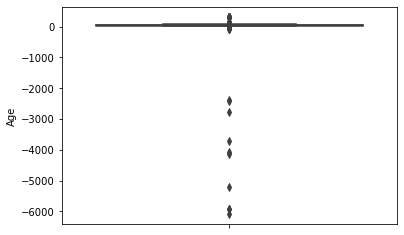

In [437]:
sns.boxplot(y=X_res['Age'])

In [438]:
from feature_engine.outliers import Winsorizer

In [439]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for skewed or gaussian
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Age'])

In [440]:
X_res=windsoriser.fit_transform(X_res)

C:\Users\GTDNL\anacondanew\envs\ikepy3Tf2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Sub-time', ylabel='Density'>

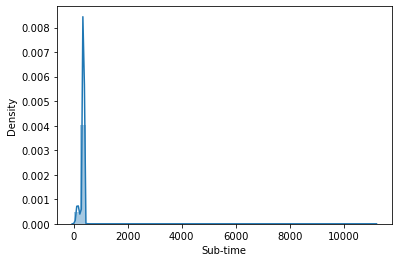

In [441]:
sns.distplot(X_res['Sub-time'])

In [442]:
X_res['Sub-time'].value_counts()

364    16025
363      856
106      302
179      269
181      254
       ...  
29         1
40         1
168        1
216        1
16         1
Name: Sub-time, Length: 321, dtype: int64

In [443]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21248 entries, 0 to 21247
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         21248 non-null  float64
 1   No_Pol                      21248 non-null  int64  
 2   Pol_start                   21248 non-null  int64  
 3   Pol_end                     21248 non-null  int64  
 4   Sub-time                    21248 non-null  int16  
 5   Gender_Male                 21248 non-null  int32  
 6   Gender_Female               21248 non-null  int32  
 7   Gender_Rare                 21248 non-null  int32  
 8   Car_Category_Saloon         21248 non-null  int32  
 9   Car_Category_Missing        21248 non-null  int32  
 10  Car_Category_JEEP           21248 non-null  int32  
 11  Car_Category_Rare           21248 non-null  int32  
 12  Subject_Car_Colour_Missing  21248 non-null  int32  
 13  Subject_Car_Colour_Rare     212

## Feature_Selection

In [444]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [445]:
y.value_counts()

0    10624
1     1455
Name: target, dtype: int64

In [446]:
mutual_info=mutual_info_classif(X_res,y_res)
mutual_info

array([0.08967137, 0.04053558, 0.00245207, 0.04868152, 0.05153292,
       0.00413796, 0.01334926, 0.00989793, 0.        , 0.        ,
       0.01082978, 0.00102972, 0.06095471, 0.02672166, 0.00055975,
       0.0038795 , 0.01467614, 0.00081194, 0.00363107, 0.        ,
       0.        , 0.05025662, 0.00283132, 0.01663337, 0.0023512 ,
       0.00062884, 0.00320521, 0.00739121, 0.00604824, 0.00561468,
       0.00015589, 0.05045229, 0.01943971, 0.        , 0.        ,
       0.00077305, 0.00928231, 0.00131275, 0.14212938, 0.02850637])

In [448]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_res.columns
mutual_info.sort_values(ascending=False)

ProductName_CarSafe           0.142129
Age                           0.089671
Subject_Car_Colour_Missing    0.060955
Sub-time                      0.051533
State_Missing                 0.050452
LGA_Name_Missing              0.050257
Pol_end                       0.048682
No_Pol                        0.040536
ProductName_Rare              0.028506
Subject_Car_Colour_Rare       0.026722
State_Lagos                   0.019440
LGA_Name_Victoria Island      0.016633
Subject_Car_Make_Missing      0.014676
Gender_Female                 0.013349
Car_Category_JEEP             0.010830
Gender_Rare                   0.009898
State_Eti-Osa                 0.009282
LGA_Name_Lagos Mainland       0.007391
LGA_Name_Lagos Island         0.006048
LGA_Name_Eti-Osa              0.005615
Gender_Male                   0.004138
Subject_Car_Make_TOYOTA       0.003879
Subject_Car_Make_Honda        0.003631
LGA_Name_Abuja Municipal      0.003205
LGA_Name_Rare                 0.002831
Pol_start                

In [449]:
sel_ten_cols=SelectKBest(mutual_info_classif,k=10)
sel_ten_cols.fit(X_res,y_res)
X.columns[sel_ten_cols.get_support()]

Index(['Age', 'No_Pol', 'Pol_end', 'Sub-time', 'Subject_Car_Colour_Missing',
       'Subject_Car_Colour_Rare', 'LGA_Name_Missing', 'State_Missing',
       'ProductName_CarSafe', 'ProductName_Rare'],
      dtype='object')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
skfold=StratifiedKFold(n_splits=10)
model=DecisionTree()
scores=cross_val_score(model,X,y,cv=skfold)
np.mean(scores)

In [450]:
resamp=pd.concat([X_res,y_res],axis=1)

In [459]:
resamp.to_csv('resamp.csv',index=False)

In [460]:
resamp.head()

,Age,No_Pol,Pol_start,Pol_end,Sub-time,Gender_Male,Gender_Female,Gender_Rare,Car_Category_Saloon,Car_Category_Missing,...,State_Missing,State_Lagos,State_Rare,State_Benue,State_Abuja-Municipal,State_Eti-Osa,ProductName_Car Classic,ProductName_CarSafe,ProductName_Rare,target
0,30.0,1,2010,2011,364,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,75.5,1,2010,2011,364,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,43.0,1,2010,2011,364,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,7.5,1,2010,2011,364,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,20.0,3,2010,2010,124,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1


In [477]:
resamp['ProductName_Rare'].value_counts()

0    16138
1     5110
Name: ProductName_Rare, dtype: int64